In [1]:
!pip install python-binance

In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
            'futuresDepth':      {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
            'futuresAllOrders':      {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOpenOrders':      {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)

In [3]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
{'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI', 'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
{'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN', 'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
{'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4', 'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
{'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr', 'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
{'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY', 'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
{'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B', 'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
{'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh', 'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
{'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7', 'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
{'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF', 'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
{'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g', 'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
{'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q', 'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
{'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS', 'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
{'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9', 'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [5]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [6]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['ZRXUSDT', 'MKRUSDT']


In [4]:
_LIMIT_ = 1000
_SYMBOL_ = 'ZECUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [5]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

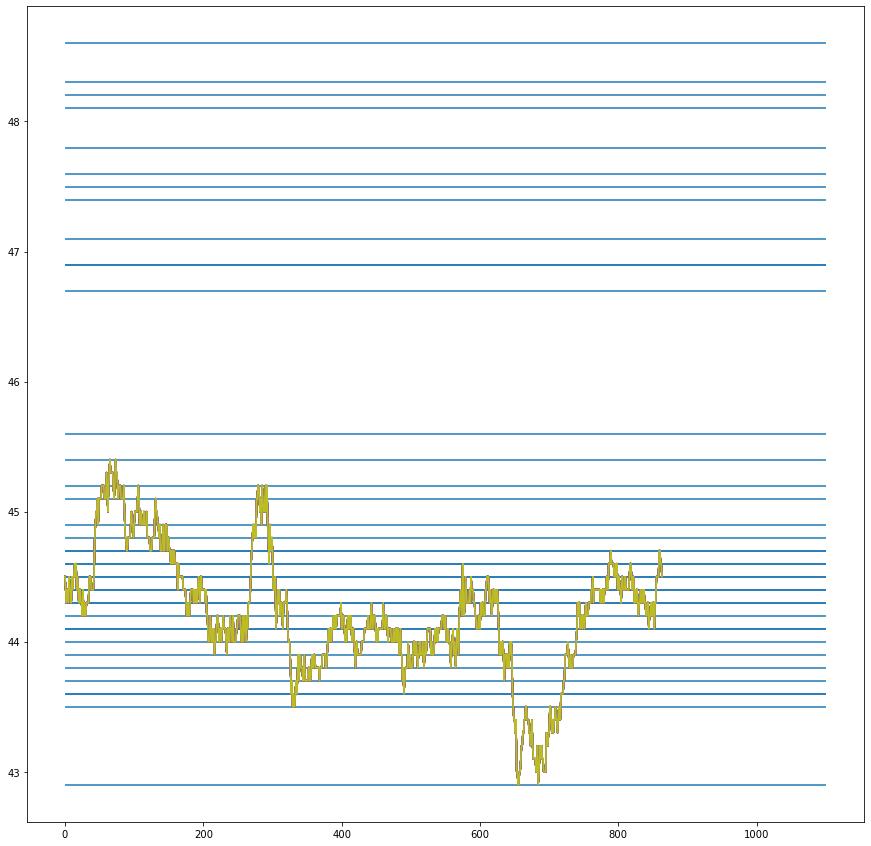

In [9]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [6]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
print(close_max_min)

[44.3, 44.4, 44.6, 44.8, 44.7, 44.5, 44.0, 44.0, 44.5, 44.6, 44.1, 44.3, 44.3, 44.2, 44.5, 45.2, 44.2, 44.7, 45.1, 45.4, 45.3, 44.5, 44.6, 44.8, 44.8, 44.7, 45.2, 45.2, 45.4, 45.3, 45.4, 45.6, 45.5, 48.1, 48.2, 48.6, 43.6, 43.6, 43.5, 44.1, 44.2, 43.8, 43.0, 42.9, 43.7, 43.8, 43.8, 43.6, 43.8, 43.7, 43.5, 44.0, 43.9, 44.2, 44.6, 44.7, 44.2, 44.1, 44.2, 44.3, 44.2, 43.5, 44.2, 44.5, 44.7, 44.7, 44.7, 44.4, 44.9, 44.6, 47.5, 47.5]


In [7]:
df=pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный'])
df

Empty DataFrame
Columns: [Монета, Тип операции, bids or asks, Цена входа, Время входа, Цена выхода, Время выхода, Правильный Неправильный]
Index: []

In [13]:
def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*taker*lots+float(deductible)*maker*lots)
    return profit
 
def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*taker*lots+float(deductible)*maker*lots)+start_sum
    return start_sum
 
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker):#Пробой asks и отcкок bids
    startTime = time.time()
    fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
    start=fuchers_last_price
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        if float(fuchers_last_price)<float(start)*(1-stop_loss):
            end=fuchers_last_price
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(fuchers_last_price)>float(start)*(1+take_profit):
            end=fuchers_last_price
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if endTime-startTime>=90 and float(fuchers_last_price)>=float(start)*(1+stop_loss):
            end=fuchers_last_price
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, taker, maker)
    start_sum = start_sum_calculate(end, start, start_sum, lots, taker, maker)
    return profit, start_sum, right_answer, false_answer
    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker): #Пробой bids и отcкок asks
    startTime = time.time()
    fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
    start=fuchers_last_price
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        endTime = time.time()
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        if float(fuchers_last_price)<float(start)*(1-take_profit):
            end=fuchers_last_price
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(fuchers_last_price)>float(start)*(1+stop_loss):
            end=fuchers_last_price
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
        if endTime-startTime>=90 and float(fuchers_last_price)<=float(start)*(1-stop_loss):
            end=fuchers_last_price
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    
    profit = profit_calculate(start, end, profit, lots, taker, maker)
    start_sum = start_sum_calculate(start, end, start_sum, lots, taker, maker)
    return profit, start_sum, right_answer, false_answer

In [14]:
i=0
profit=0.031467179135210584
start_sum=20.03146717913521
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=1
false_answer=0
bot_number=0
maker=0.000162
taker=0.000324
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(fuchers_last_price)))
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        lots=start_sum/float(fuchers_last_price)

        if float(fuchers_last_price) == nearest_close_max and nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker)

        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        lots=start_sum/float(fuchers_last_price)
        if float(fuchers_last_price) == nearest_close_min and nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker)

        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        lots=start_sum/float(fuchers_last_price)
        if float(fuchers_last_price) == nearest_bids:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker)
            set(bids).remove(nearest_bids)            

        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        lots=start_sum/float(fuchers_last_price)
        if float(fuchers_last_price) == nearest_asks:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker)
            set(asks).remove(nearest_asks)

        if i%15==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4587008742646029
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных о

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Непра

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45692215280874104
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45702640153171825
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456505633070538
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456505633070538
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильны

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4560898720203827
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4561937412693056
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4561937412693056
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4561937412693056
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4561937412693056
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4561937412693056
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправ

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных 

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45681795163364214
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45681795163364214
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45681795163364214
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Непр

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправил

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Непр

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправ

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Непра

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Непра

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправ

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4587008742646029
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4587008742646029
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4587008742646029
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4587008742646029
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.459016204838112
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4593319692532724
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправ

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45943732062236714
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45943732062236714
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45943732062236714
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45943732062236714
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45943732062236714
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4593319692532724
Заработали: 0.031467179135210584
Правильных ответов: 1 Непр

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных 

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4610234103368287
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправи

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4597536648871978
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4597536648871978
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4597536648871978
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4597536648871978
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4597536648871978
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4597536648871978
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46049349837092435
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46049349837092435
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправи

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46187381090927393
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46187381090927393
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46187381090927393
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46176733930694347
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4616609167811756
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4616609167811756
Заработали: 0.031467179135210584
Правильных ответов: 1 Непра

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.461448218823663
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4615545432980463
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4615545432980463
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.461448218823663
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4612357167657198
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильн

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46049349837092435
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильн

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных отв

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Работаем на отскок buy bids 43.55
Ошибка: name 'endTime' is not defined
Работаем на отскок buy bids 43.55
Ошибка: name 'endTime' is not defined
Работаем на отскок buy bids 43.55
Ошибка: name 'endTime' is not defined
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45996480319483835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45996480319483835

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45954272032886456
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45954272032886456
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45954272032886456
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45954272032886456
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45964816840603967
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45954272032886456
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45954272032886456
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45954272032886456
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45964816840603967
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45964816840603967
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45964816840603967
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45964816840603967
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45996480319483835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45996480319483835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Непр

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных от

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46049349837092435
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4603876621267573
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильн

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4601761355188424
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильны

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных от

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46028187452057
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46007044508808476
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46049349837092435
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46091733039887733
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46091733039887733
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46091733039887733
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4610234103368287
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4610234103368287
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46112953911453064
Заработали: 0.031467179135210584
Правильных ответов: 1 Непра

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.46049349837092435
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4605993832866224
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправил

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правильных

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильны

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных отв

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4607999850664404
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4607999850664404
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правиль

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46005795610498074
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46005795610498074
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильн

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4599521470074405
Заработали: -0.0012806481164879136
Правил

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильн

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4610124331923354
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4611187307328456
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4609061846481565
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4609061846481565
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4609061846481565
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4610124331923354
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4611187307328456
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4611187307328456
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4611187307328456
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4611187307328456
Заработали: -0.0012806481164879136
Правильны

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4609061846481565
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4609061846481565
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4609061846481565
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4609061846481565
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4607999850664404
Заработали: -0.0012806481164879136
Правильных

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правиль

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных от

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46069383441334977
Заработали: -0.0012806481164879136
Правильных отве

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правил

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45963501153490033
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Работаем на отскок buy bids 43.53
Ошибка: name 'endTime' is not defined
Работаем на отскок buy bids 43.53
Ошибка: name 'endTime' is not defined
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Не

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правиль

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильны

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правиль

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4597406747559428
Заработали: -0.0012806481164879136
Правильных

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46005795610498074
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46016381389515676
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4595293968723233
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правильн

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правиль

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4593183130887348
Заработали: -0.0012806481164879136
Правиль

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4599521470074405
Заработали: -0.0012806481164879136
Правил

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4594238307347464
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4590020507662041
Заработали: -0.0012806481164879136
Правил

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45910742313782166
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45921284390088435
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4603756756879262
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.460481679757852
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4605877326550786
Заработали: -0.0012806481164879136
Правильных отве

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4613314729384893
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4613314729384893
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4613314729384893
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4613314729384893
Заработали: -0.0012806481164879136
Правильны

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46122507730358653
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46143791767151615
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4610124331923354
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4610124331923354
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4611187307328456
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4610124331923354
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4610124331923354
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4611187307328456
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.46026972041158826
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4599521470074405
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45984638656894716
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4599521470074405
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4599521470074405
Заработали: -0.0012806481164879136
Правильн

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45868622366705303
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правиль

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4588967267527194
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45879145106408603
Заработали: -0.0012806481164879136
Правильны

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45868622366705303
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45868622366705303
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45868622366705303
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45868622366705303
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45868622366705303
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45868622366705303
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильны

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильн

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильн

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4585810445283997
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45837083089350245
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4584759136149361
Заработали: -0.0012806481164879136
Правильны

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45721809217840675
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45721809217840675
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45721809217840675
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45721809217840675
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45721809217840675
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45721809217840675
Заработали: -0.0012806481164879136
Прави

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45753190006596917
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45753190006596917
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45753190006596917
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45753190006596917
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45753190006596917
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4574272495856247
Заработали: -0.0012806481164879136
Правил

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4573226469673797
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4573226469673797
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4574272495856247
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4574272495856247
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4574272495856247
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45763659844127025
Заработали: -0.0012806481164879136
Правильных

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45763659844127025
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45753190006596917
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45763659844127025
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45763659844127025
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.45763659844127025
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4577413447444155
Заработали: -0.0012806481164879136
Правил

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4580558715502408
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4582657963309696
Заработали: -0.0012806481164879136
Правильных 

Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Заработали: -0.0012806481164879136
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.998719351883512 Кол-во торгуемых лотов: 0.4581608098942386
Работаем на отскок buy asks 43.68
Закрылись по стопу sell asks 43.75
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45784613900832216
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45574207701696046
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4558461752529168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4558461752529168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4558461752529168
Заработали: -0.04305444742730154
Правильных ответов: 1 Не

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45543006737956865
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45543006737956865
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45543006737956865
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45543006737956865
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45543006737956865
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45543006737956865
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4555340231128212
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4555340231128212
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4555340231128212
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4555340231128212
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4555340231128212
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4555340231128212
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45636738057563914
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45626304418318925
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45636738057563914
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45636738057563914
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45636738057563914
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45636738057563914
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45636738057563914
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4558461752529168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4558461752529168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4558461752529168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4558461752529168
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45522229818824583
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4551184846652839
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4553261590821971
Заработали: -0.04305444742730154
Правильных ответов: 1 Не

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45563802631444517
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45626304418318925
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45626304418318925
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45626304418318925
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45626304418318925
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45615875548737594
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4559503210548937
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45605451445550044
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Непр

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4590969761346376
Заработали: -0.04305444742730154
Правильных ответов: 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4590969761346376
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4590969761346376
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправи

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправ

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Непра

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправ

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Непр

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Не

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457099073581601
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4569944023946118
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4568897791339903
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Непра

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45772810900396094
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправил

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4574133750303162
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45720379272789685
Заработали: -0.04305444742730154
Правильных ответов: 1 Не

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4573085598664688
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.457518238252469
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4576231495659871
Заработали: -0.04305444742730154
Правильных ответов: 1 Непр

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45783311659951126
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4579381723857893
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45804327639597653
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4582536292209575
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Работаем на отскок buy bids 43.48
Ошибка: name 'endTime'

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4596256460749124
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4596256460749124
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4596256460749124
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4596256460749124
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4596256460749124
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4596256460749124
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45835887810226683
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45814842866328503
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45856952096904174
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4584641753405168
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45941403205738257
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45951981470349296
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4596256460749124
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 1 Не

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4598374551284032
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45973152620531443
Заработали: -0.04305444742730154
Правильных ответов:

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4590969761346376
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Н

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4586749150212066
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4590969761346376
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4590969761346376
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45930829810293894
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45941403205738257
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4588858485300689
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.45878035753040686
Заработали: -0.04305444742730154
Правильных ответов: 1

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4589913880536499
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4590969761346376
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4592026128065508
Заработали: -0.04305444742730154
Правильных ответов: 1 Неп

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46004945948761405
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4599434328779142
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46026165942280206
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46058032662295634
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46058032662295634
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46058032662295634
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4607930166837381
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4607930166837381
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4606866471046329
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4610059032703326
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4610059032703326
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4610059032703326
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4610059032703326
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4610059032703326
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46111242034594957
Заработали: -0.04305444742730154
Правильных ответов: 1 Не

Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.4608994353942887
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.460474055204723
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46058032662295634
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46058032662295634
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46058032662295634
Заработали: -0.04305444742730154
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 19.956945552572698 Кол-во торгуемых лотов: 0.46058032662295634
Заработали: -0.04305444742730154
Правильных ответов: 1 

Заработали: -0.02978967278435638
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 19.970210327215643 Кол-во торгуемых лотов: 0.45950783081490204
Заработали: -0.02978967278435638
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 19.970210327215643 Кол-во торгуемых лотов: 0.4594021239295064
Заработали: -0.02978967278435638
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 19.970210327215643 Кол-во торгуемых лотов: 0.4592964656673331
Заработали: -0.02978967278435638
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 19.970210327215643 Кол-во торгуемых лотов: 0.4594021239295064
Заработали: -0.02978967278435638
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 19.970210327215643 Кол-во торгуемых лотов: 0.4594021239295064
Заработали: -0.02978967278435638
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 19.970210327215643 Кол-во торгуемых лотов: 0.4594021239295064
Заработали: -0.02978967278435638
Правильных ответов: 2 Не

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4592842353559129
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4592842353559129
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4592842353559129
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4590732641867095
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4590732641867095
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4590732641867095
Заработали: -0.011950077310669015
Правильных ответов: 3 Не

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46002416392840806
Заработали: -0.011950077310669015
Правильных ответов: 3 

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4607664804677116
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460979011132134
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46087272129788637
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46087272129788637
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Не

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4601300626770104
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4601300626770104
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4601300626770104
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46002416392840806
Заработали: -0.011950077310669015
Правильных ответов: 3

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Н

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4598125125992485
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4598125125992485
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4598125125992485
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4598125125992485
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Не

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4597067599514566
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45991831391369836
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45991831391369836
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46002416392840806
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46002416392840806
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46002416392840806
Заработали: -0.011950077310669015
Правильных ответов:

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.45960105593675166
Заработали: -0.011950077310669015
Правильных ответов

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4601300626770104
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4601300626770104
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46034200651057877
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46023601019316907
Заработали: -0.011950077310669015
Правильных ответов: 3

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправил

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4607664804677116
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4607664804677116
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4607664804677116
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46087272129788637
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46087272129788637
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46087272129788637
Заработали: -0.011950077310669015
Правильных ответов: 3

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46161778112446494
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46161778112446494
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4617244149385385
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46140466118858103
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46140466118858103
Заработали: -0.011950077310669015
Правильных ответов: 3 

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4617244149385385
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46140466118858103
Работаем на отскок buy bids 43.32
Ошибка: name 'endTime' is not defined
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4612981749985999
Заработали: -0.011950077310669015
Правильных ответов: 3 Не

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46034200651057877
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неп

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46034200651057877
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4604480516629655
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4606602886077283
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.460554145684086
Заработали: -0.011950077310669015
Правильных ответов: 3 Неп

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46140466118858103
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4615111965525128
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46140466118858103
Заработали: -0.011950077310669015
Правильных ответов: 3 

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46279346892079953
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46311515112811247
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.463007874048861
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46236525382117355
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46279346892079953
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46279346892079953
Заработали: -0.011950077310669015
Правильных ответов: 

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.463007874048861
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.463007874048861
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.463007874048861
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.463007874048861
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46311515112811247
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46311515112811247
Заработали: -0.011950077310669015
Правильных ответов: 3 Непр

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46268634080299376
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46268634080299376
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46268634080299376
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.462900646657928
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46279346892079953
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46279346892079953
Заработали: -0.011950077310669015
Правильных ответов: 

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46268634080299376
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46268634080299376
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4625792622700609
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46236525382117355
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46247223328758286
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46247223328758286
Заработали: -0.011950077310669015
Правильных ответов:

Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46322247793022786
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46332985448978514
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46332985448978514
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46332985448978514
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.4634372808413942
Заработали: -0.011950077310669015
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 19.98804992268933 Кол-во торгуемых лотов: 0.46354475701969694
Заработали: -0.011950077310669015
Правильных ответов:

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46504185464850606
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46504185464850606
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4651499034065563
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4651499034065563
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4651499034065563
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4653661516182748
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправил

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Непр

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.463427125986532
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.463427125986532
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4636417749564193
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4637491740240487
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4636417749564193
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4636417749564193
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4636417749564193
Заработали: 0.02005184261818303
Правильных ответов: 4 Непра

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46321267567372015
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46321267567372015
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46321267567372015
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4633198760152322
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4631055249275546
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправ

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4636417749564193
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4636417749564193
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46396412149752453
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46353442562209274
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46321267567372015
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправ

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46321267567372015
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46321267567372015
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.4631055249275546
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46299842374232614
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46299842374232614
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46299842374232614
Заработали: 0.02005184261818303
Правильных ответов: 4 Непра

Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46439461476729726
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46439461476729726
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46428691657277793
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46428691657277793
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Неправильных ответов: 2
Конечеая сумма: 20.020051842618184 Кол-во торгуемых лотов: 0.46450236293777686
Заработали: 0.02005184261818303
Правильных ответов: 4 Непр

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4632004834773061
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4632004834773061
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4632004834773061
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4632004834773061
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4628786674860064
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46277149483782726
Заработали: -0.012899137954242733
Правильных ответо

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4630931617712178
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4632004834773061
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4632004834773061
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46277149483782726
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46277149483782726
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46277149483782726
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4628786674860064
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4628786674860064
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46298588978563254
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4628786674860064
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46255729835792075
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46255729835792075
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46255729835792075
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46255729835792075
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46266437180661474
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46266437180661474
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46234330007045477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46234330007045477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответ

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46032014882647987
Работаем на отскок buy bids 43.41
Ошибка: name 'endTime' is not defined
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46021415754192396
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46021415754192396
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46021415754192396
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых ло

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46032014882647987
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46032014882647987
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4607446026289939
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4607446026289939
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46032014882647987
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46032014882647987
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4604261889436941
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4607446026289939
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4607446026289939
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4607446026289939
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4607446026289939
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4607446026289939
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответ

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4605322779273216
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46063841581114906
Заработали: -0.012899137954242733
Правильных ответ

Работаем на отскок buy bids 43.31
Ошибка: name 'endTime' is not defined
Работаем на отскок buy bids 43.33
Ошибка: name 'endTime' is not defined
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильн

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46234330007045477
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4617024916157486
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4617024916157486
Заработали: -0.012899137954242733
Правильных отв

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных от

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46148928335363093
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответо

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46223637516294536
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46245027445732895
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46245027445732895
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46245027445732895
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46234330007045477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46234330007045477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46212949970047995
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4618091696406136
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4617024916157486
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4617024916157486
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4617024916157486
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4617024916157486
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4617024916157486
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46148928335363093
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46148928335363093
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных отв

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных отве

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4608508384147051
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4608508384147051
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46202267364876926
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46191589697355573
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46148928335363093
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46148928335363093
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных о

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46148928335363093
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответо

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46159586286479815
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных отв

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4611698399179916
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4613827530481477
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4612762719142801
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.46106345702527696
Заработали: -0.012899137954242733
Правильных ответ

Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4609571232021623
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4608508384147051
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4608508384147051
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4608508384147051
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4608508384147051
Заработали: -0.012899137954242733
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 19.987100862045757 Кол-во торгуемых лотов: 0.4608508384147051
Заработали: -0.012899137954242733
Правильных ответов

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46009572236719115
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46009572236719115
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46009572236719115
Работаем на отскок buy bids 43.36
Ошибка: name 'endTime' is not defined
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46009572236719115
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46009572236719115
Работаем на отскок buy bids 43.36
Ошибка: name 'endTime' is not defined
Работаем на отскок buy bids 43.36
Ошибка: name 'endTime' is not de

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.460839526075406
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.460839526075406
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4609459801123834
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4610524833425388
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4610524833425388
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4610524833425388
Заработали: -0.04564852093492309
Правильных ответов: 4 Непра

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4609459801123834
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4609459801123834
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4609459801123834
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4609459801123834
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4609459801123834
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4609459801123834
Заработали: -0.04564852093492309
Правильных ответов: 4 Неп

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46179938623154543
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46179938623154543
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4616925376923896
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4616925376923896
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4616925376923896
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46147898887754574
Заработали: -0.04564852093492309
Правильных ответов: 4 

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4616925376923896
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46179938623154543
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46179938623154543
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46179938623154543
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46179938623154543
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46179938623154543
Заработали: -0.04564852093492309
Правильных ответов: 

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4623343716187461
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4622272754010905
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4622272754010905
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46212022878798237
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46212022878798237
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46212022878798237
Заработали: -0.04564852093492309
Правильных ответов: 4 

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46201323174496595
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46201323174496595
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46201323174496595
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46212022878798237
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46212022878798237
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46212022878798237
Заработали: -0.04564852093492309
Правильных ответов:

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46308543697064464
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4629779925537141
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4629779925537141
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4629779925537141
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46308543697064464
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46308543697064464
Заработали: -0.04564852093492309
Правильных ответов: 4 

Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46330047548328485
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4634080696485155
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4634080696485155
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.4634080696485155
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46351571379942114
Заработали: -0.04564852093492309
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.954351479065078 Кол-во торгуемых лотов: 0.46330047548328485
Заработали: -0.04564852093492309
Правильных ответов: 4 

Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46253662797142764
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46253662797142764
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46253662797142764
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46253662797142764
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46253662797142764
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46242926106614185
Заработали: -0.07854743327061164
Правильных ответов: 4 Неп

Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46200029143621035
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46200029143621035
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4623219439946481
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4623219439946481
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправи

Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46189317335333613
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4621074592143213
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46253662797142764
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4623219439946481
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправи

Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4621074592143213
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46200029143621035
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4622146767222596
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправил

Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46318187785932086
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46318187785932086
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46328959457510205
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46328959457510205
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46318187785932086
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46318187785932086
Заработали: -0.07854743327061164
Правильных ответов: 4 Неп

Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46328959457510205
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4633973614033354
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.46328959457510205
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4635051783789993
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4635051783789993
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.92145256672939 Кол-во торгуемых лотов: 0.4635051783789993
Заработали: -0.07854743327061164
Правильных ответов: 4 Неправи

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46188127949641844
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46188127949641844
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4616668499330497
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4615597097961424
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4615597097961424
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4615597097961424
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправи

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.461345578638733
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Непра

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.461345578638733
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.461345578638733
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.461345578638733
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправиль

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46123858754906727
Заработали: -0.11139210488422056
Правильных ответов: 4 Неп

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46102475417514555
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46091791182191844
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46091791182191844
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46091791182191844
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46102475417514555
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46081111897858623
Заработали: -0.11139210488422056
Правильных ответов: 4 Неп

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46145261937623616
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4615597097961424
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4615597097961424
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4615597097961424
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправ

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4619885689922365
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4619885689922365
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4622032975857722
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4620959083437681
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46188127949641844
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46188127949641844
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправи

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4623107367530399
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4622032975857722
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4622032975857722
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4622032975857722
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4623107367530399
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4623107367530399
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправиль

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46284868268828905
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46284868268828905
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46284868268828905
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46295642213956656
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46295642213956656
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46284868268828905
Заработали: -0.11139210488422056
Правильных ответов: 4 Неп

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4624182258803948
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4624182258803948
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4623107367530399
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4624182258803948
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4624182258803948
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46263335415482154
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправил

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4624182258803948
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4624182258803948
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46252576500269255
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46252576500269255
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46252576500269255
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.46252576500269255
Заработали: -0.11139210488422056
Правильных ответов: 4 Непра

Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4617740398215876
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4617740398215876
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4617740398215876
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4617740398215876
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4617740398215876
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправильных ответов: 6
Конечеая сумма: 19.88860789511578 Кол-во торгуемых лотов: 0.4617740398215876
Заработали: -0.11139210488422056
Правильных ответов: 4 Неправиль

Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45941430348006446
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45952062477223754
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45952062477223754
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45952062477223754
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45952062477223754
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45941430348006446
Заработали: -0.14411380359161527
Правильных ответов:

Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45941430348006446
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45941430348006446
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45941430348006446
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.45941430348006446
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.459308031376553
Заработали: -0.14411380359161527
Правильных ответов: 4 Неправильных ответов: 7
Конечеая сумма: 19.855886196408385 Кол-во торгуемых лотов: 0.459308031376553
Заработали: -0.14411380359161527
Правильных ответов: 4 Н

Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов:

Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46162243012361986
Заработали: -0.09945703737074744
Правильных ответов:

Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46183668978021003
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46183668978021003
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46183668978021003
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46183668978021003
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46183668978021003
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46172953509580633
Заработали: -0.09945703737074744
Правильных ответов:

Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46172953509580633
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46172953509580633
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46172953509580633
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46215845245307136
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46215845245307136
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.46215845245307136
Заработали: -0.09945703737074744
Правильных ответов:

Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.4611945066657996
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.4611945066657996
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.4611945066657996
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.4611945066657996
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.4611945066657996
Заработали: -0.09945703737074744
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.900542962629252 Кол-во торгуемых лотов: 0.4611945066657996
Заработали: -0.09945703737074744
Правильных ответов: 7 Неп

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46118360504718847
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неп

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46118360504718847
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46097009411892587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46097009411892587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46097009411892587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46086341277337645
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46086341277337645
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46086341277337645
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46118360504718847
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4617182486885601
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4618253262044898
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.461932453396836
Заработали: -0.08609193406240248
Правильных ответов: 8 Непр

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46236145962241926
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46236145962241926
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46236145962241926
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46203963030017625
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46203963030017625
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46214685694912033
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46225413337831006
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46150424254780065
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46161122081450157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46139731385397587
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46129043469857767
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45958707745067157
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46001173633489484
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов: 8

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45979930884178244
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Н

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.460118023704658
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.460118023704658
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46022436020193197
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46022436020193197
Заработали: -0.08609193406240248
Правильных ответов: 8 Н

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4604371807153202
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46033074586078593
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46022436020193197
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.46022436020193197
Заработали: -0.08609193406240248
Правильных ответов: 

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45979930884178244
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45990549805860503
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4596931686504524
Заработали: -0.08609193406240248
Правильных ответов: 8 Неп

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45937504189014067
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45926909746166045
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45916320188926907
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45916320188926907
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45937504189014067
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45937504189014067
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45895155717763536
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45895155717763536
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45916320188926907
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45916320188926907
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45916320188926907
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45926909746166045
Заработали: -0.08609193406240248
Правильных ответов:

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4584232980188213
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4584232980188213
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45852885254288733
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45852885254288733
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4584232980188213
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45852885254288733
Заработали: -0.08609193406240248
Правильных ответов: 8 

Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45758060813275725
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45747548968384094
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4573704195208452
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.4573704195208452
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45747548968384094
Заработали: -0.08609193406240248
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 19.913908065937598 Кол-во торгуемых лотов: 0.45747548968384094
Заработали: -0.08609193406240248
Правильных ответов: 8

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45756824065092533
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45756824065092533
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4579888963536612
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4579888963536612
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4586213321138733
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45883253235891774
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45893820544329333
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45893820544329333
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45893820544329333
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.459467301829555
Заработали: -0.07290311965220328
Правильных ответов: 9 

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4593613849780497
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4593613849780497
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4591496977038663
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4591496977038663
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4591496977038663
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4591496977038663
Заработали: -0.07290311965220328
Правильных ответов: 9 Неп

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45883253235891774
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45872690792697507
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45872690792697507
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45872690792697507
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45893820544329333
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4590439272137249
Заработали: -0.07290311965220328
Правильных ответов: 

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45819951437911693
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4583048960521573
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4583048960521573
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45819951437911693
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45819951437911693
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45819951437911693
Заработали: -0.07290311965220328
Правильных ответов: 9

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45746319743681807
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45756824065092533
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45746319743681807
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4573582024408491
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4573582024408491
Заработали: -0.07290311965220328
Правильных ответов: 9

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4570435064299953
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4570435064299953
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4570435064299953
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45693870397495523
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45693870397495523
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45693870397495523
Заработали: -0.07290311965220328
Правильных ответов: 9 

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45725325562982555
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45725325562982555
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45725325562982555
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45714835697058487
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45714835697058487
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45714835697058487
Заработали: -0.07290311965220328
Правильных ответов:

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45788365993446223
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4577784718664782
Заработали: -0.07290311965220328
Правильных ответов: 9 

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.45767333211639405
Работаем на отскок buy bids 43.52
Ошибка: name 'endT

Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4580941811574206
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4580941811574206
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4580941811574206
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4579888963536612
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4579888963536612
Заработали: -0.07290311965220328
Правильных ответов: 9 Неправильных ответов: 7
Конечеая сумма: 19.927096880347797 Кол-во торгуемых лотов: 0.4579888963536612
Заработали: -0.07290311965220328
Правильных ответов: 9 Неп

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных от

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4568078995361254
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4567031030462111
Заработали: -0.09231173821565805
Правильных отве

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4567031030462111
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4567031030462111
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4567031030462111
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4567031030462111
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4567031030462111
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4567031030462111
Заработали: -0.09231173821565805
Правильных ответов:

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных от

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45691274413092364
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45691274413092364
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45691274413092364
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45691274413092364
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4568078995361254
Заработали: -0.09231173821565805
Правильных отве

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4568078995361254
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4568078995361254
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45691274413092364
Заработали: -0.09231173821565805
Правильных ответов

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.4570176368637361
Заработали: -0.09231173821565805
Правильных ответов:

Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45649365424866645
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных ответов: 10 Неправильных ответов: 8
Конечеая сумма: 19.907688261784344 Кол-во торгуемых лотов: 0.45659835462808124
Заработали: -0.09231173821565805
Правильных от

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45543509991736725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45679585751307533
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45679585751307533
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4569008680550323
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45679585751307533
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45679585751307533
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45669089522963935
Заработали: -0.12481223960609507
Правильных отв

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45669089522963935
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4558529302842639
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45627152801638904
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45627152801638904
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответо

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных от

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45669089522963935
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45669089522963935
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45669089522963935
Заработали: -0.12481223960609507
Правильных ответ

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных от

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных от

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4563762975980231
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45627152801638904
Заработали: -0.12481223960609507
Правильных ответо

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45616680652728725
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45606213309761146
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4559575076942855
Заработали: -0.12481223960609507
Правильных ответ

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4555394856840226
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4553307619792419
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4557484008345312
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4556439193121024
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4564811153053263
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4565859811714658
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45795363503211767
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45795363503211767
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4580591786216618
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4580591786216618
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4582704118144779
Заработали: -0.12481223960609507
Правильных ответо

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4582704118144779
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4582704118144779
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4582704118144779
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4581647708712288
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных от

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45932950682676
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45932950682676
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45932950682676
Заработали: -0.12481223960609507
Правильных ответов: 10 Не

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4592233770885838
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных отве

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4589052819301294
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Работаем на отскок buy bids 43.28
Ошибка: name 'endTime' is not defined
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4590112646742242
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов:

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4591172963823956
Ошибка: HTTPSConnectionPool(host='fapi.binance.com', port=443): Max retries exceeded with url: /fapi/v1/ticker/price?symbol=ZECUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45858762714337575
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45858762714337575
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45858762714337575
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45858762714337575
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45858762714337575
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45858762714337575
Заработали: -0.12481223960609507
Правильных от

Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.4587993481162028
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45869346319856696
Заработали: -0.12481223960609507
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 19.875187760393906 Кол-во торгуемых лотов: 0.45848183991681446
Заработали: -0.12481223960609507
Правильных ответ

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45931732953396226
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45931732953396226
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 1

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Н

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Не

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45931732953396226
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45931732953396226
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45931732953396226
Заработали: -0.11155963117943785
Правильных ответо

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Не

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4595295833830999
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4595295833830999
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459635783887695
Заработали: -0.11155963117943785
Правильных ответов: 11 

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4595295833830999
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45942343194318697
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45931732953396226
Заработали: -0.11155963117943785
Правильных отв

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.459211276121463
Заработали: -0.11155963117943785
Правильных ответов: 11 Н

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4587875517605666
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45899931615094774
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4587875517605666
Заработали: -0.11155963117943785
Правильных отве

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45889340952516294
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4591052716717582
Заработали: -0.11155963117943785
Правильных отве

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4586817428233525
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4587875517605666
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4587875517605666
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4587875517605666
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4586817428233525
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4586817428233525
Заработали: -0.11155963117943785
Правильных ответов:

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4586817428233525
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4586817428233525
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4586817428233525
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4585759826797456
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4585759826797456
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4585759826797456
Заработали: -0.11155963117943785
Правильных ответов:

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов:

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45836460863840894
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных отв

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4582589946732849
Заработали: -0.11155963117943785
Правильных ответов:

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4575210574837949
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4575210574837949
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4575210574837949
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4575210574837949
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4576263315421207
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4576263315421207
Заработали: -0.11155963117943785
Правильных ответов:

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4573106546061293
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4573106546061293
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4573106546061293
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4573106546061293
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4573106546061293
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4573106546061293
Заработали: -0.11155963117943785
Правильных ответов:

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4571004451579077
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4571004451579077
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4571004451579077
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4569954128865019
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4569954128865019
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4569954128865019
Заработали: -0.11155963117943785
Правильных ответов:

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.4564709747262007
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных отв

Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных ответов: 11 Неправильных ответов: 9
Конечеая сумма: 19.888440368820564 Кол-во торгуемых лотов: 0.45657576604271266
Заработали: -0.11155963117943785
Правильных от

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправил

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45666787806635567
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправил

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправ

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Непра

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправ

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправи

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправи

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45740257701980647
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Непра

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Непра

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4576129254111699
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45729747532471915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45750772703751214
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45750772703751214
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45750772703751214
Заработали: -0.0984138738682224
Правильных ответов: 12 Непра

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправ

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправи

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45666787806635567
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправил

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4560400120561819
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4556223929975224
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4556223929975224
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4556223929975224
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.455726726039198
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.455726726039198
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.455726726039198
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправ

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45645839738834354
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45666787806635567
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45666787806635567
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45666787806635567
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4561445364687549
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4562491088063223
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4563537291018523
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4565631136988249
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4568775511049536
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4567726905240252
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4569824598422912
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45708741676921866
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправи

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45803420313306736
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45750772703751214
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45750772703751214
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4571924219189474
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправи

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45740257701980647
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45740257701980647
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45740257701980647
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458139643787564
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных 

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45866757608047426
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458456257224874
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458456257224874
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458456257224874
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458456257224874
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.458456257224874
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных 

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45856189230718386
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45856189230718386
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45856189230718386
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45856189230718386
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45856189230718386
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45856189230718386
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4579288110016516
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправил

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4578234673598293
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45771817217414396
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45877330857841814
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45866757608047426
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45877330857841814
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45877330857841814
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправиль

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46004591137613915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46004591137613915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45909079875736514
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45909079875736514
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45909079875736514
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45877330857841814
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45866757608047426
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45866757608047426
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45866757608047426
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45866757608047426
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45866757608047426
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45887908983471937
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45930270311866556
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45919672649127313
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45919672649127313
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4594087286734021
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4594087286734021
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45962092670050303
Заработали: -0.0984138738682224
Правильных ответов: 12 Непра

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45909079875736514
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45909079875736514
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45909079875736514
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45898491988311296
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.45951480318937377
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4594087286734021
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46036516599888455
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46036516599888455
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46036516599888455
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46036516599888455
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46036516599888455
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46036516599888455
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46004591137613915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46004591137613915
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4599395915445292
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправи

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46079152873655427
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46079152873655427
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46089824284696107
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46089824284696107
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46111181941917934
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4612186819497516
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46132559402252615
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46132559402252615
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46132559402252615
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46132559402252615
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46132559402252615
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46132559402252615
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46079152873655427
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46079152873655427
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46079152873655427
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46079152873655427
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4606848640308282
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46079152873655427
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46057824869548203
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4604716826962466
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46025869856919005
Заработали: -0.0984138738682224
Правильных ответов: 12 Непр

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46057824869548203
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4606848640308282
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46057824869548203
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4606848640308282
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46057824869548203
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46036516599888455
Заработали: -0.0984138738682224
Правильных ответов: 12 Непра

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46100500639638126
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46100500639638126
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46100500639638126
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46100500639638126
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46089824284696107
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46100500639638126
Заработали: -0.0984138738682224
Правильных ответов: 12 Неп

Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4653164864655548
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4659701738733734
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.46618847800730334
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4648817128271847
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4648817128271847
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправильных ответов: 9
Конечеая сумма: 19.90158612613178 Кол-во торгуемых лотов: 0.4653164864655548
Заработали: -0.0984138738682224
Правильных ответов: 12 Неправил

Заработали: -0.1363331736513755
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 19.863666826348627 Кол-во торгуемых лотов: 0.4701459603869498
Заработали: -0.1363331736513755
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 19.863666826348627 Кол-во торгуемых лотов: 0.46903581644270664
Заработали: -0.1363331736513755
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 19.863666826348627 Кол-во торгуемых лотов: 0.4692574256165516
Заработали: -0.1363331736513755
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 19.863666826348627 Кол-во торгуемых лотов: 0.4689250903292877
Заработали: -0.1363331736513755
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 19.863666826348627 Кол-во торгуемых лотов: 0.46870379486429037
Заработали: -0.1363331736513755
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 19.863666826348627 Кол-во торгуемых лотов: 0.4684827081685997
Заработали: -0.1363331736513755
Правильных ответов

Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4740475070538399
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.47382106926685463
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4739342611133111
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.47450103253296344
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.47438756982791014
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4739342611133111
Заработали: -0.16111182979680216
Правильных ответов: 13

Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4729174772396472
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4731430519962605
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.47303023772539826
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.47336884204732055
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4737079314757211
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4735948477011984
Заработали: -0.16111182979680216
Правильных ответов: 13 

Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.47518295018450785
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.47506916116386977
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4755246445398658
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4759810021641843
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4764382365562728
Заработали: -0.16111182979680216
Правильных ответов: 13 Неправильных ответов: 11
Конечеая сумма: 19.8388881702032 Кол-во торгуемых лотов: 0.4758668306597074
Заработали: -0.16111182979680216
Правильных ответов: 13 

Работаем на отскок buy asks 40.65
Закрылись по тейку sell asks 40.56
Заработали: -0.22461396925101484
Правильных ответов: 14 Неправильных ответов: 13
Конечеая сумма: 19.77538603074899 Кол-во торгуемых лотов: 0.4848065854616687
Заработали: -0.22461396925101484
Правильных ответов: 14 Неправильных ответов: 13
Конечеая сумма: 19.77538603074899 Кол-во торгуемых лотов: 0.48852238218253435
Заработали: -0.22461396925101484
Правильных ответов: 14 Неправильных ответов: 13
Конечеая сумма: 19.77538603074899 Кол-во торгуемых лотов: 0.4897321949170131
Заработали: -0.22461396925101484
Правильных ответов: 14 Неправильных ответов: 13
Конечеая сумма: 19.77538603074899 Кол-во торгуемых лотов: 0.4902177994732025
Заработали: -0.22461396925101484
Правильных ответов: 14 Неправильных ответов: 13
Конечеая сумма: 19.77538603074899 Кол-во торгуемых лотов: 0.49009630807308524
Заработали: -0.22461396925101484
Правильных ответов: 14 Неправильных ответов: 13
Конечеая сумма: 19.77538603074899 Кол-во торгуемых лотов: 

Работаем на отскок buy bids 37.39
Ошибка: name 'endTime' is not defined
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.531376934635135
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5338190562595733
Работаем на отскок buy bids 36.77
Ошибка: name 'endTime' is not defined
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5386243014468526
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5354112497570936
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5383306131690735
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных

Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5177233060052862
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5177233060052862
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5171809033798223
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5173163974598275
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5163694270669879
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5154259172811697
Заработали: -0.2540331089583891
Правильных ответов: 

Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5165044962344132
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5163694270669879
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5165044962344132
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5167748466642663
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5171809033798223
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5186752532451173
Заработали: -0.2540331089583891
Правильных ответов: 

Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5112886300114349
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5111562746839662
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5108917694965489
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5102317026108945
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5104955245874254
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5103635795048234
Заработали: -0.2540331089583891
Правильных ответов: 

Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5103635795048234
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5103635795048234
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5106275379116011
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5102317026108945
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5111562746839662
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5116861075678054
Заработали: -0.2540331089583891
Правильных ответов: 

Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5177233060052862
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5171809033798223
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5159646430896685
Заработали: -0.2540331089583891
Правильных ответов: 14 Неправильных ответов: 14
Конечеая сумма: 19.745966891041615 Кол-во торгуемых лотов: 0.5155604932386845
Работаем на отскок buy asks 38.32
Закрылись по стопу sell asks 38.39
Заработали: -0.2997058910813538
Правильных ответов: 14 Неправильных ответов: 15
Конечеая сумма: 19.70029410891865 Кол-во торгуемых лотов: 0.5152914115616288
Заработали: -0.2997058910813538
Правильных ответов: 14 Неправильных ответов: 15
Конечеая сумма: 19.70029410891865 Кол-во торгуемых лотов: 0.51

Заработали: -0.2997058910813538
Правильных ответов: 14 Неправильных ответов: 15
Конечеая сумма: 19.70029410891865 Кол-во торгуемых лотов: 0.5106348913664762
Заработали: -0.2997058910813538
Правильных ответов: 14 Неправильных ответов: 15
Конечеая сумма: 19.70029410891865 Кол-во торгуемых лотов: 0.5106348913664762
Работаем на отскок buy asks 38.65
Закрылись по стопу sell asks 38.69
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5097100675011295
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5086715298774356
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5086715298774356
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.508671

Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5091982412725973
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5093300896002184
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5094620062253414
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5088031055447604
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5085400222430309
Заработали: -0.329671939639572
Правильных ответов: 14 Неправильных ответов: 16
Конечеая сумма: 19.670328060360433 Кол-во торгуемых лотов: 0.5081459070100861
Заработали: -0.329671939639572
Правильных ответов: 14 Непр

Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5045064144411386
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5046360742752279
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5048955939842921
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5045064144411386
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5047658007724709
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5047658007724709
Заработали: -0.3646103499508884
Правильных ответов: 

Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5072433389317778
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5076367541377744
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5076367541377744
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5076367541377744
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5076367541377744
Заработали: -0.3646103499508884
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.635389650049117 Кол-во торгуемых лотов: 0.5076367541377744
Заработали: -0.3646103499508884
Правильных ответов: 

Работаем на отскок buy asks 38.70
Закрылись по стопу sell asks 38.75
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5073744095619926
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5056881842226103
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5059492519480737
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5062105893716006
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5051668561976386
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лот

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5075213366252816
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5077843010484034
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5079158854746922
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5077843010484034
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5076527847829158
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5076527847829158
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5089710210456603
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5092354902693784
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5087068263812192
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5093678279747499
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5091032213108669
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5088388894202589
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5088388894202589
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5087068263812192
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5084429058487258
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5079158854746922
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5077843010484034
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5077843010484034
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5073899565226087
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5071274002708506
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5071274002708506
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5072586444220594
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5073899565226087
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5075213366252816
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5056881842226103
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5054273857779364
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5052970874057329
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5054273857779364
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5052970874057329
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5055577513662206
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5056881842226103
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5055577513662206
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5054273857779364
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5055577513662206
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5047765650391032
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5049065950661611
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.505036692101736
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.505036692101736
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5052970874057329
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5052970874057329
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5049065950661611
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5052970874057329
Заработали: -0.39952597953162855
Правильных отве

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5066031021056702
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5063413593507717
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5059492519480737
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5063413593507717
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5064721969113275
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5066031021056702
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5068651156055954
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.506996224016254
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5076527847829158
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5075213366252816
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5072586444220594
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5073899565226087
Заработали: -0.39952597953162855
Правильных отв

Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5062105893716006
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5064721969113275
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5063413593507717
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5062105893716006
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5062105893716006
Заработали: -0.39952597953162855
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.600474020468376 Кол-во торгуемых лотов: 0.5063413593507717
Заработали: -0.39952597953162855
Правильных от

Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5062259825730715
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5062259825730715
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5059642318064876
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5055721127944961
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5054415414843736
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5055721127944961
Заработали: -0.42930351372506165
Правильных от

Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5041395282399522
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5041395282399522
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5041395282399522
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.504009695757789
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.504009695757789
Заработали: -0.42930351372506165
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.570696486274944 Кол-во торгуемых лотов: 0.5037502313069483
Заработали: -0.42930351372506165
Правильных отве

Работаем на отскок buy asks 38.89
Закрылись по тейку sell asks 38.81
Заработали: -0.39854978208809044
Правильных ответов: 15 Неправильных ответов: 19
Конечеая сумма: 19.601450217911914 Кол-во торгуемых лотов: 0.5032321030155552
Заработали: -0.39854978208809044
Правильных ответов: 15 Неправильных ответов: 19
Конечеая сумма: 19.601450217911914 Кол-во торгуемых лотов: 0.5049317418318371
Заработали: -0.39854978208809044
Правильных ответов: 15 Неправильных ответов: 19
Конечеая сумма: 19.601450217911914 Кол-во торгуемых лотов: 0.5048017053286612
Заработали: -0.39854978208809044
Правильных ответов: 15 Неправильных ответов: 19
Конечеая сумма: 19.601450217911914 Кол-во торгуемых лотов: 0.5051920159255648
Заработали: -0.39854978208809044
Правильных ответов: 15 Неправильных ответов: 19
Конечеая сумма: 19.601450217911914 Кол-во торгуемых лотов: 0.5053222536197968
Заработали: -0.39854978208809044
Правильных ответов: 15 Неправильных ответов: 19
Конечеая сумма: 19.601450217911914 Кол-во торгуемых лот

Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5042961549446467
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5042961549446467
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5039066368023105
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5037769311042919
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5037769311042919
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5036472921616506
Заработали: -0.4282662265982635
Правильных ответов: 

Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5052073767011291
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5050770006039159
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5050770006039159
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5049466917802308
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5050770006039159
Заработали: -0.4282662265982635
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.571733773401743 Кол-во торгуемых лотов: 0.5050770006039159
Заработали: -0.4282662265982635
Правильных ответов: 

Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5095963562885036
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5099933412453631
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.50854074498599
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5086724571706535
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5093320428256983
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5097286159189963
Заработали: -0.36015642864107256
Правильных ответов: 1

Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5097286159189963
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5097286159189963
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5099933412453631
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5098609442201176
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5098609442201176
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5098609442201176
Заработали: -0.36015642864107256
Правильных ответов:

Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5077519020516786
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5078832058794654
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5077519020516786
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5077519020516786
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5078832058794654
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5078832058794654
Заработали: -0.36015642864107256
Правильных ответов:

Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5067039105097764
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5067039105097764
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5070963999834478
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5068346728092628
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5069655026163895
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5069655026163895
Заработали: -0.36015642864107256
Правильных ответов:

Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.507489497967931
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5073583976067924
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5072273649627823
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5070963999834478
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5072273649627823
Заработали: -0.36015642864107256
Правильных ответов: 18 Неправильных ответов: 21
Конечеая сумма: 19.63984357135893 Кол-во торгуемых лотов: 0.5073583976067924
Заработали: -0.36015642864107256
Правильных ответов: 

Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5097405623347218
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.509212743994225
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5090809601577876
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5090809601577876
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5096085051942205
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5090809601577876
Заработали: -0.3291116995030914
Правильных ответов: 1

Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5101371447224303
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5100048820455513
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5094765164593865
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5097405623347218
Работаем на отскок buy bids 38.57
Ошибка: name 'endTime' is not defined
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5097405623347218
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов:

Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5096085051942205
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5096085051942205
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5096085051942205
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5097405623347218
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5096085051942205
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5096085051942205
Заработали: -0.3291116995030914
Правильных ответов: 

Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5084230628197703
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5078979679963056
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5081603797596722
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5081603797596722
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5081603797596722
Заработали: -0.3291116995030914
Правильных ответов: 19 Неправильных ответов: 21
Конечеая сумма: 19.670888300496912 Кол-во торгуемых лотов: 0.5082916873513413
Заработали: -0.3291116995030914
Правильных ответов: 

Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5072574648472156
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5072574648472156
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5072574648472156
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5072574648472156
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5073885052669642
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5073885052669642
Заработали: -0.3589909611158178
Правильных ответов: 

Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5064726415390455
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5066032767316013
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5067339793313773
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5066032767316013
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5067339793313773
Заработали: -0.3589909611158178
Правильных ответов: 19 Неправильных ответов: 22
Конечеая сумма: 19.641009038884185 Кол-во торгуемых лотов: 0.5064726415390455
Заработали: -0.3589909611158178
Правильных ответов: 

Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5068790110297541
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5071411672288901
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5071411672288901
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5071411672288901
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5070100552414991
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5070100552414991
Заработали: -0.38885106325881724
Правильных от

Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5064862845232744
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5064862845232744
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5060941661094499
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5060941661094499
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5060941661094499
Заработали: -0.38885106325881724
Правильных ответов: 19 Неправильных ответов: 23
Конечеая сумма: 19.611148936741184 Кол-во торгуемых лотов: 0.5060941661094499
Заработали: -0.38885106325881724
Правильных от

Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.50741895845531
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.50741895845531
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5075502101258883
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.50741895845531
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.50741895845531
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5075502101258883
Заработали: -0.37810887653316233
Правильных ответов: 20 Непр

Работаем на отскок buy bids 38.65
Ошибка: name 'endTime' is not defined
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5080758965164899
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5080758965164899
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5080758965164899
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5078129172739865
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5078129172739865
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов:

Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5063713838314022
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.506240741059516
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.506240741059516
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.506240741059516
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.506240741059516
Заработали: -0.37810887653316233
Правильных ответов: 20 Неправильных ответов: 23
Конечеая сумма: 19.62189112346684 Кол-во торгуемых лотов: 0.5061101656813731
Заработали: -0.37810887653316233
Правильных ответов: 20 

Заработали: -0.4079032522589889
Правильных ответов: 20 Неправильных ответов: 24
Конечеая сумма: 19.59209674774101 Кол-во торгуемых лотов: 0.5043010745879282
Заработали: -0.4079032522589889
Правильных ответов: 20 Неправильных ответов: 24
Конечеая сумма: 19.59209674774101 Кол-во торгуемых лотов: 0.5045608227592329
Заработали: -0.4079032522589889
Правильных ответов: 20 Неправильных ответов: 24
Конечеая сумма: 19.59209674774101 Кол-во торгуемых лотов: 0.5044309152353503
Заработали: -0.4079032522589889
Правильных ответов: 20 Неправильных ответов: 24
Конечеая сумма: 19.59209674774101 Кол-во торгуемых лотов: 0.5048208386431592
Заработали: -0.4079032522589889
Правильных ответов: 20 Неправильных ответов: 24
Конечеая сумма: 19.59209674774101 Кол-во торгуемых лотов: 0.5048208386431592
Заработали: -0.4079032522589889
Правильных ответов: 20 Неправильных ответов: 24
Конечеая сумма: 19.59209674774101 Кол-во торгуемых лотов: 0.5048208386431592
Заработали: -0.4079032522589889
Правильных ответов: 20 Неп

Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5052252897141738
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5050951776127796
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5050951776127796
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5052252897141738
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5052252897141738
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5052252897141738
Заработали: -0.38715425329577147
Правильных от

Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5050951776127796
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5050951776127796
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5050951776127796
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5050951776127796
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5053554688663805
Заработали: -0.38715425329577147
Правильных ответов: 21 Неправильных ответов: 24
Конечеая сумма: 19.612845746704227 Кол-во торгуемых лотов: 0.5056160285306581
Заработали: -0.38715425329577147
Правильных от

Заработали: -0.41694258160329467
Правильных ответов: 21 Неправильных ответов: 25
Конечеая сумма: 19.583057418396706 Кол-во торгуемых лотов: 0.50393868806991
Заработали: -0.41694258160329467
Правильных ответов: 21 Неправильных ответов: 25
Конечеая сумма: 19.583057418396706 Кол-во торгуемых лотов: 0.5040684020179332
Заработали: -0.41694258160329467
Правильных ответов: 21 Неправильных ответов: 25
Конечеая сумма: 19.583057418396706 Кол-во торгуемых лотов: 0.5040684020179332
Заработали: -0.41694258160329467
Правильных ответов: 21 Неправильных ответов: 25
Конечеая сумма: 19.583057418396706 Кол-во торгуемых лотов: 0.50393868806991
Заработали: -0.41694258160329467
Правильных ответов: 21 Неправильных ответов: 25
Конечеая сумма: 19.583057418396706 Кол-во торгуемых лотов: 0.50393868806991
Заработали: -0.41694258160329467
Правильных ответов: 21 Неправильных ответов: 25
Конечеая сумма: 19.583057418396706 Кол-во торгуемых лотов: 0.50393868806991
Заработали: -0.41694258160329467
Правильных ответов: 2

Заработали: -0.44661038976552403
Правильных ответов: 21 Неправильных ответов: 26
Конечеая сумма: 19.553389610234476 Кол-во торгуемых лотов: 0.5023995274983164
Заработали: -0.44661038976552403
Правильных ответов: 21 Неправильных ответов: 26
Конечеая сумма: 19.553389610234476 Кол-во торгуемых лотов: 0.5025286458554222
Заработали: -0.44661038976552403
Правильных ответов: 21 Неправильных ответов: 26
Конечеая сумма: 19.553389610234476 Кол-во торгуемых лотов: 0.5023995274983164
Заработали: -0.44661038976552403
Правильных ответов: 21 Неправильных ответов: 26
Конечеая сумма: 19.553389610234476 Кол-во торгуемых лотов: 0.5023995274983164
Заработали: -0.44661038976552403
Правильных ответов: 21 Неправильных ответов: 26
Конечеая сумма: 19.553389610234476 Кол-во торгуемых лотов: 0.5022704754748132
Заработали: -0.44661038976552403
Правильных ответов: 21 Неправильных ответов: 26
Конечеая сумма: 19.553389610234476 Кол-во торгуемых лотов: 0.5022704754748132
Заработали: -0.44661038976552403
Правильных от

Заработали: -0.5057236048031698
Правильных ответов: 21 Неправильных ответов: 28
Конечеая сумма: 19.49427639519683 Кол-во торгуемых лотов: 0.49985324090248284
Заработали: -0.5057236048031698
Правильных ответов: 21 Неправильных ответов: 28
Конечеая сумма: 19.49427639519683 Кол-во торгуемых лотов: 0.4997251062598521
Заработали: -0.5057236048031698
Правильных ответов: 21 Неправильных ответов: 28
Конечеая сумма: 19.49427639519683 Кол-во торгуемых лотов: 0.4997251062598521
Заработали: -0.5057236048031698
Правильных ответов: 21 Неправильных ответов: 28
Конечеая сумма: 19.49427639519683 Кол-во торгуемых лотов: 0.49985324090248284
Заработали: -0.5057236048031698
Правильных ответов: 21 Неправильных ответов: 28
Конечеая сумма: 19.49427639519683 Кол-во торгуемых лотов: 0.49985324090248284
Заработали: -0.5057236048031698
Правильных ответов: 21 Неправильных ответов: 28
Конечеая сумма: 19.49427639519683 Кол-во торгуемых лотов: 0.49985324090248284
Заработали: -0.5057236048031698
Правильных ответов: 21

Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5002509406203189
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5001226711483651
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5002509406203189
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5002509406203189
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5001226711483651
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5001226711483651
Заработали: -0.4952158252137633
Правильных ответов: 

Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5001226711483651
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5001226711483651
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.4999944674387654
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.4999944674387654
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5001226711483651
Заработали: -0.4952158252137633
Правильных ответов: 22 Неправильных ответов: 28
Конечеая сумма: 19.504784174786238 Кол-во торгуемых лотов: 0.5001226711483651
Заработали: -0.4952158252137633
Правильных ответов: 

Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Заработали: -0.4747059974405831
Правильных ответов: 

Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5014199795212999
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5010339749181272
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5009054387521656
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5010339749181272
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Заработали: -0.4747059974405831
Правильных ответов: 23 Неправильных ответов: 28
Конечеая сумма: 19.525294002559416 Кол-во торгуемых лотов: 0.5011625770677468
Работаем на отскок buy asks 38.98
Закрылись по стопу

Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.500019378666047
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.5001476874622147
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.5001476874622147
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.5001476874622147
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.4997629584718592
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.49963484697263544
Заработали: -0.5092446195974916
Правильных ответов: 

Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.49963484697263544
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.4993788209173074
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.4993788209173074
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.4993788209173074
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.4993788209173074
Заработали: -0.5092446195974916
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.490755380402508 Кол-во торгуемых лотов: 0.4993788209173074
Заработали: -0.5092446195974916
Правильных ответов:

Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 

Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5006739673912632
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5006739673912632
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5006739673912632
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5006739673912632
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.500802543140465
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5006739673912632
Заработали: -0.4987489701102961
Правильных ответов: 2

Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5004170138539827
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5002886359643332
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5001603239263838
Ошибка: HTTPSConnectionPool(host='fapi.binance.com',

Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.5000320776894797
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.49964773327926476
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.49964773327926476
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.4995197497410273
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.4995197497410273
Заработали: -0.4987489701102961
Правильных ответов: 24 Неправильных ответов: 29
Конечеая сумма: 19.501251029889705 Кол-во торгуемых лотов: 0.4993918317513369
Заработали: -0.4987489701102961
Правильных ответов

Работаем на отскок buy asks 39.12
Закрылись по тейку sell asks 38.97
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.49774499680063133
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5010770667454897
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5009485854463243
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5009485854463243
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5009485854463243
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых ло

Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5010770667454897
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5009485854463243
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5006918204102164
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5006918204102164
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5006918204102164
Заработали: -0.46300516759335664
Правильных ответов: 25 Неправильных ответов: 30
Конечеая сумма: 19.536994832406645 Кол-во торгуемых лотов: 0.5006918204102164
Заработали: -0.46300516759335664
Правильных от

Заработали: -0.4975323784751512
Правильных ответов: 25 Неправильных ответов: 31
Конечеая сумма: 19.50246762152485 Кол-во торгуемых лотов: 0.4991673309834873
Заработали: -0.4975323784751512
Правильных ответов: 25 Неправильных ответов: 31
Конечеая сумма: 19.50246762152485 Кол-во торгуемых лотов: 0.4991673309834873
Заработали: -0.4975323784751512
Правильных ответов: 25 Неправильных ответов: 31
Конечеая сумма: 19.50246762152485 Кол-во торгуемых лотов: 0.4992951259991001
Заработали: -0.4975323784751512
Правильных ответов: 25 Неправильных ответов: 31
Конечеая сумма: 19.50246762152485 Кол-во торгуемых лотов: 0.4987843381464156
Заработали: -0.4975323784751512
Правильных ответов: 25 Неправильных ответов: 31
Конечеая сумма: 19.50246762152485 Кол-во торгуемых лотов: 0.4987843381464156
Заработали: -0.4975323784751512
Правильных ответов: 25 Неправильных ответов: 31
Конечеая сумма: 19.50246762152485 Кол-во торгуемых лотов: 0.49865680443684096
Заработали: -0.4975323784751512
Правильных ответов: 25 Не

Заработали: -0.5618412496111306
Правильных ответов: 25 Неправильных ответов: 32
Конечеая сумма: 19.438158750388872 Кол-во торгуемых лотов: 0.4956185300966056
Заработали: -0.5618412496111306
Правильных ответов: 25 Неправильных ответов: 32
Конечеая сумма: 19.438158750388872 Кол-во торгуемых лотов: 0.49587139669359365
Заработали: -0.5618412496111306
Правильных ответов: 25 Неправильных ответов: 32
Конечеая сумма: 19.438158750388872 Кол-во торгуемых лотов: 0.49587139669359365
Заработали: -0.5618412496111306
Правильных ответов: 25 Неправильных ответов: 32
Конечеая сумма: 19.438158750388872 Кол-во торгуемых лотов: 0.49574493114993295
Заработали: -0.5618412496111306
Правильных ответов: 25 Неправильных ответов: 32
Конечеая сумма: 19.438158750388872 Кол-во торгуемых лотов: 0.49574493114993295
Заработали: -0.5618412496111306
Правильных ответов: 25 Неправильных ответов: 32
Конечеая сумма: 19.438158750388872 Кол-во торгуемых лотов: 0.49574493114993295
Заработали: -0.5618412496111306
Правильных отве

Заработали: -0.591106041585537
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 19.408893958414467 Кол-во торгуемых лотов: 0.493990683594158
Заработали: -0.591106041585537
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 19.408893958414467 Кол-во торгуемых лотов: 0.4941164449698184
Заработали: -0.591106041585537
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 19.408893958414467 Кол-во торгуемых лотов: 0.4941164449698184
Заработали: -0.591106041585537
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 19.408893958414467 Кол-во торгуемых лотов: 0.493990683594158
Заработали: -0.591106041585537
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 19.408893958414467 Кол-во торгуемых лотов: 0.49386498621919767
Заработали: -0.591106041585537
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 19.408893958414467 Кол-во торгуемых лотов: 0.4942422703950717
Заработали: -0.591106041585537
Правильных ответов: 25 Непра

Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4941275829387667
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4941275829387667
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4938762464265903
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4938762464265903
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4938762464265903
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.49375067402729544
Заработали: -0.5807859905064752
Правильных ответов: 26 Не

Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4932490223391804
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4932490223391804
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.49349972069869197
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4933743396720917
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4932490223391804
Заработали: -0.5807859905064752
Правильных ответов: 26 Неправильных ответов: 33
Конечеая сумма: 19.41921400949353 Кол-во торгуемых лотов: 0.4933743396720917
Заработали: -0.5807859905064752
Правильных ответов: 26 Не

KeyboardInterrupt: 

In [15]:
df.to_csv (r'scalping_bot_version9_1.csv', index= False)